In [83]:
# from google.colab import drive
# drive.mount('/content/drive')

In [84]:
import os
import torch
import torchvision
import torch.utils.data
from PIL import Image

In [85]:
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder


transform = transforms.Compose([transforms.ToTensor(), transforms.Resize(size=(512,512))])

# path = r"/content/drive/MyDrive/Datasets for glycoma/MyOrigaFolder" #for colab
# path = r"D:\Datasets\MyOrigaFolder"  # for windows

#git hub dataset
path = r"D:\Datasets\dataset\train"  # for windows
test_path = r"D:\Datasets\dataset\test"  # for windows
my_ds1 = ImageFolder(path, transform=transform)

In [86]:
img, label = my_ds1[80]
print(img.shape)
print(label)

torch.Size([3, 512, 512])
0


c:\Users\hpary\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


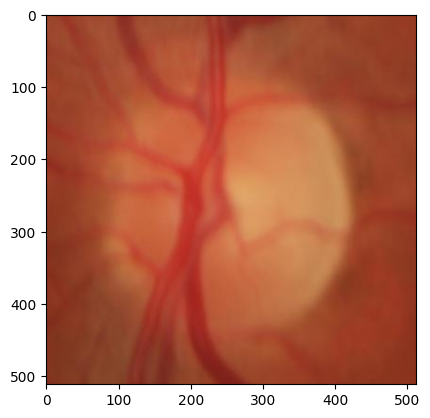

In [87]:
import matplotlib.pyplot as plt

plt.imshow(my_ds1[0][0].permute(1, 2, 0))

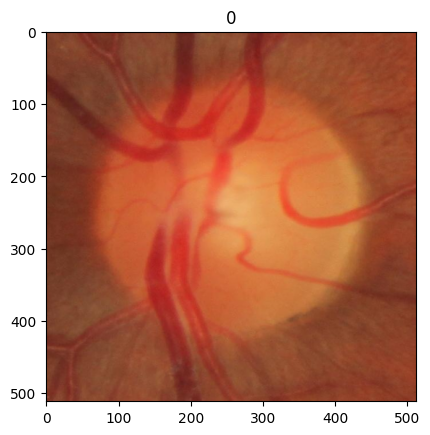

In [88]:
from torch.utils.data import Dataset
import torchvision.transforms as tt
# see youtube vid about how to create custom datasets
# https://www.analyticsvidhya.com/blog/2021/09/torch-dataset-and-dataloader-early-loading-of-data/
# https://youtu.be/NVxCKdp0NhQ


dataloader = torch.utils.data.DataLoader(my_ds1, batch_size=36, shuffle=False)

toPil = tt.ToPILImage()

for img, label in dataloader:
    plt.title(label=label[35].item())
    plt.imshow(toPil(img[35]))
    break


# checked the customDS and dataloader, and they were tested/crosschecked to be found ok, img 36 in OG dataset is with glycoma and the label we got from dataloader is 1

In [89]:
import torchvision.transforms as tt

In [114]:
import torchvision.transforms as tt

#normalize is not working properly, ie its not giving values between -1 and 1

train_transforms = tt.Compose([
    
    tt.ToTensor(),
    tt.RandomHorizontalFlip(),
    tt.RandomVerticalFlip(),
    tt.RandomRotation(degrees=45),
    # tt.Normalize([0.64566187, 0.29739011, 0.17928236],[0.14744558, 0.11072611, 0.07712533]),
    transforms.Resize(size=(512,512)),
])
test_transforms = tt.Compose([
    tt.ToTensor(),
    # tt.Normalize([0.65267069, 0.30094331, 0.17525753], [0.14621546, 0.1140823,  0.08098041]),
    transforms.Resize(size=(512,512)),
])



my_ds1 = None  # this souldnt be used now so mark it as None

train_ds = ImageFolder(path, transform=train_transforms)
test_ds = ImageFolder(test_path, transform=test_transforms)

print(len(train_ds))
print(len(test_ds))
print(len(train_ds) + len(test_ds))
print(train_ds[1])

455
64
519
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), 0)


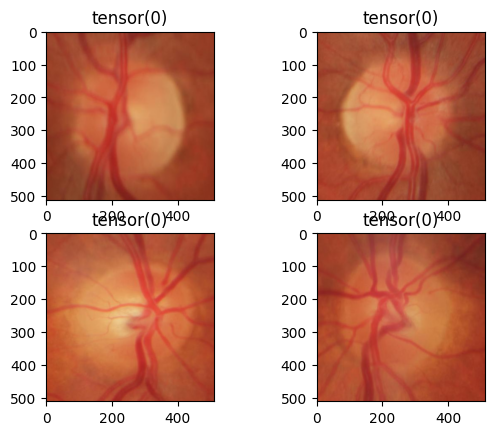

In [115]:
trainLoader = torch.utils.data.DataLoader(train_ds, 4, shuffle=True,)
testLoader = torch.utils.data.DataLoader(test_ds, 4, shuffle=False,)

# lets see if we can apply our transforms
for img, label in testLoader:

    # transformed_imgs_batch = [train_transforms(one_img) for one_img in img] #train_transforms can only take one img at a time

    plt.subplot(2, 2, 1)
    plt.title(label=label[0])
    plt.imshow(img[0].permute(1, 2, 0))

    plt.subplot(2, 2, 2)
    plt.title(label[0])
    # applying/testing our trnsform func, FIRST APPLY the transforms func then apply the .premute()
    plt.imshow(img[1].permute(1, 2, 0))

    plt.subplot(2, 2, 3)
    plt.title(label[2])
    plt.imshow(img[2].permute(1, 2, 0))

    plt.subplot(2, 2, 4)
    plt.title(label[3])
    plt.imshow(img[3].permute(1, 2, 0))

    break

In [92]:
import torch.nn as nn
import torch.functional as F

In [93]:
# IMPORANT!!!!!!!!!!!!!!!! These functions return data and do not do it inplace, make sure to assign the return values to a variable


def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda:0')
    else:
        return torch.device('cpu')


def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list, tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)


class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""

    def __init__(self, dl, device):
        self.dl = dl
        self.device = device

    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl:
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [94]:
import torch.nn.functional as F


def train_step(model, input_batch, actual_outputs, loss_func):
        pred = model(input_batch)
        loss = loss_func(pred, actual_outputs)
        return loss

def accuracy(outputs, labels):
        preds = torch.Tensor([[round(x.item())]  for x in outputs]) #the preds should be of shape [4,1]
        preds = to_device(preds, get_default_device()) # IMPORANT!!!!!!!!!!!!!!!! These functions return data and do not do it inplace, make sure to assign the return values to a variable
        acc = torch.sum(preds == labels).item() / len(preds)
        return acc

def validation(model, trainLoader, loss_func):
        with torch.no_grad(): # IMPORTANT!!!!!! Remeber to put with torch.no_grad() when testing the model or the gradients will keep accumulating and the memory will run out
            losses_sum = 0
            accuracies_sum = 0
            counter = 0
            model.eval()
            for imgs, labels in trainLoader:
                predictions = model(imgs)
                labels = torch.unsqueeze(labels, 1) # get the labels to shape [4,1]
                # also change dtype of labels frm int64 to float32
                labels = labels.type(torch.float32)

                loss  = loss_func(predictions, labels)
                losses_sum += loss

                acc = accuracy(predictions, labels)
                accuracies_sum += acc

                counter += 1

                avg_acc = accuracies_sum/counter
                avg_loss = losses_sum/counter

                # print(f" avg_acc = {avg_acc}")

        return avg_acc,avg_loss




def fit_model(model, lr, trainLoader, epochs, opt=torch.optim.Adam, train_transforms=train_transforms, loss_func = F.binary_cross_entropy, grad_clip_value=None):

    optimizer = opt(model.parameters(), lr,)
    model.train()

    lr_schduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,mode="min",factor=0.1,patience=3,verbose=True)
    

    for epoch in range(epochs):

        epoch_losses = []

        for imgs, labels in trainLoader:
            labels = torch.unsqueeze(labels, 1) # get the labels to shape [4,1]
            # also change dtype of labels frm int64 to float32
            labels = labels.type(torch.float32)

            loss = train_step(model, imgs, labels, loss_func)
            loss.backward()

            if grad_clip_value!=None:
                nn.utils.clip_grad.clip_grad_value_(model.parameters(), grad_clip_value)
        

            optimizer.step()
            optimizer.zero_grad()

            epoch_losses.append(loss.item())

        avg_loss = sum(epoch_losses)/len(epoch_losses)
        print(f"Avg loss for epoch {epoch} = {avg_loss}")
        lr_schduler.step(avg_loss)

            



    acc,loss = validation(model, trainLoader, loss_func)
    print(f"Done! Accuracy: {acc} & Loss: {loss}")









In [95]:
# model = torchvision.models.resnet50()
# num_of_input_features = model.fc.in_features
# model.fc = nn.Sequential(
#     nn.Linear(num_of_input_features, 1),
#     nn.Sigmoid(),
# )


# model = torchvision.models.densenet169()
# num_of_input_features = model.classifier.in_features
# model.classifier = nn.Sequential(
#     nn.Linear(num_of_input_features, 1),
#     nn.Sigmoid(),
# )

# model = torchvision.models.efficientnet_b6()
# num_of_input_features = model.classifier[1].in_features
# print(num_of_input_features)
# model.classifier = nn.Sequential(
#     nn.Dropout(0.5),
#     nn.Linear(num_of_input_features, 1),
#     nn.Sigmoid(),
# )


model = torchvision.models.vgg19_bn()
num_of_input_features = model.classifier[6].in_features # in this we only change the last layer of the classifier, see the original model for more
print(num_of_input_features)
model.classifier[6] = nn.Sequential(
    nn.Linear(num_of_input_features, 1),
    nn.Sigmoid(),
)


print(model)

4096
VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128

In [96]:
torchvision.models.densenet169()

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [97]:

total_params = sum(p.numel() for p in model.parameters())
print(f"Number of parameters: {total_params}")

Number of parameters: 139585345


In [98]:
for img, lable in trainLoader:
    print(img.shape)
    print(label)
    print(
        f"Model output shape = {model(img).shape} & label shape = {label.shape}")
    print(model(img))
    break

torch.Size([4, 3, 512, 512])
tensor([0, 0, 0, 0])
Model output shape = torch.Size([4, 1]) & label shape = torch.Size([4])
tensor([[0.5709],
        [0.4461],
        [0.4409],
        [0.6867]], grad_fn=<SigmoidBackward0>)


In [99]:
x = 1
print(torch.tensor(x))
print(torch.Tensor(x))

b = [1, 2, 3]
print(torch.Tensor(b))

c = [[1], [2], [3]]
print(torch.Tensor(c))

d = [[[1, 5], [1, 5]], [[2, 5], [2, 5]]]
print(torch.Tensor(d))

tensor(1)
tensor([8.9082e-39])
tensor([1., 2., 3.])
tensor([[1.],
        [2.],
        [3.]])
tensor([[[1., 5.],
         [1., 5.]],

        [[2., 5.],
         [2., 5.]]])


In [100]:
import torch.nn.functional as F

F.binary_cross_entropy(torch.Tensor(
    [[0.1], [0.2], [0.3]]), torch.Tensor([[0], [0], [0]]))

tensor(0.2284)

In [101]:
for img, label in testLoader:
    print(label.shape)
    out = model(img)
    print(out.shape)
    # since label put shapr is [4] and out is [4,1] we have to unsqueez label in 1st dim
    print(torch.unsqueeze(label, 1) .shape)

    # unsqeezing in 0th dim will result in shape [1,4]
    print(torch.unsqueeze(label, 0) .shape)
    break

torch.Size([4])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([1, 4])


Moving to gpu


In [102]:
device = get_default_device()

model = to_device(model, device)

trainLoader = DeviceDataLoader(trainLoader, device)
testLoader = DeviceDataLoader(testLoader, device)

In [103]:
print(device)
print(model)

cpu
VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128,

In [104]:
print("Initial acc:")  # 195/4 = 49 (number of batches not num of images)
validation(model, testLoader, F.binary_cross_entropy)

Initial acc:


(0.5, tensor(0.6924))

In [106]:
fit_model(model, 0.00001, trainLoader, 1, grad_clip_value = 0.1)
# working confirmed!

KeyboardInterrupt: 

In [108]:
import gc
gc.collect()

print(len(testLoader))

validation(model, testLoader, F.binary_cross_entropy)


# simple model needs more complexity and layers!!!
# after around 30 epochs resnet50 avg_acc = 70.3%, initial acc = 0.5 (random guessing) no normailze() no grayscale(), lr = ReduceLROnPlateau, grad_clip value  = 0.1

# DenseNet max acc = 87.5% 30 epochs , initial acc = 0.5 (random guessing) no normailze() no grayscale(), lr = ReduceLROnPlateau, grad_clip value  = 0.1

# below models not tested for new data augmentaion and lr scheduler and grad_clip.... !!!Weight Decay has yet to be implemented!!!
# Inception + resnet test = (Still remaining)(also was it called Inception_resnet?)

# EfficientNet max acc = 50% (pathetic)

# VGG - 19BN max acc = 0.640, more testing required currently tested for 7 epochs, tested with new and more train transforms

16


(0.5, tensor(0.6918))